In [1]:
import time
import ROOT
import numpy as np
import pandas as pd
import root_pandas as rpd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.colors import LogNorm
from root_pandas import read_root
%run functions.ipynb

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed',)).History will not be written to the database.
Welcome to JupyROOT 6.14/06


In [2]:
def getData(inputFiles):
    cols = []
    scalar = []   
    cols.append('matched_truthE')
    cols.append('e')
    cols.append('eta')
    cols.append('nComponent')
    cols.append('matched_truthNComponent')

    lists = scalar
    dataframes = []
    for inputFilename in inputFiles:
        start = time.time()
        df = read_root(inputFilename, columns=lists+cols,flatten=cols)
        dataframes.append(df)
        end = time.time()
        print '\n', 'Processed', inputFilename, 'in',  '%2.1f'%(end-start), 'seconds'
    return pd.concat([x for x in dataframes])

In [20]:
file1 = ["$HOME/EIC/output/sphenix/618.root"]

In [21]:
a = getData(file1)


Processed $HOME/EIC/output/sphenix/618.root in 0.8 seconds


In [5]:
a.eval('de_e = (e - matched_truthE) / matched_truthE', inplace=True)
b = applyCut(a, 'abs(eta) < 0.7', 'eta')
b = applyCut(b, 'nComponent > 3', 'nComponent')
b = applyCut(b, 'matched_truthNComponent > 3', 'matched_truthNComponent')
b = applyCut(b, 'matched_truthE > 5', 'matched_truthE')
b = applyCut(b, 'e > 5', 'e')

eta 16773  fraction kept: 58.2
nComponent 2212  fraction kept: 13.2
matched_truthNComponent 2168  fraction kept: 98.0
matched_truthE 1970  fraction kept: 90.9
e 1324  fraction kept: 67.2


In [6]:
a.eval('de_e = (e - matched_truthE) / matched_truthE', inplace=True)
c = applyCut(a, 'abs(eta) < 0.1', 'eta')
c = applyCut(c, 'nComponent > 1', 'nComponent')
c = applyCut(c, 'e > 5', 'e')

eta 2158  fraction kept: 7.5
nComponent 1302  fraction kept: 60.3
e 288  fraction kept: 22.1


In [7]:
x = np.arange(-0.95, 1.05, 0.1)
y = np.histogram(a['de_e'], bins=20, range=(-1,1))[0]
xerr = 0.05
yerr = np.sqrt(y)

/home/youqi/.local/lib/python2.7/site-packages/numpy/lib/histograms.py:834: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/youqi/.local/lib/python2.7/site-packages/numpy/lib/histograms.py:835: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.1,3000,'$Q^2 > 16 \\, \\mathrm{GeV^2}$')

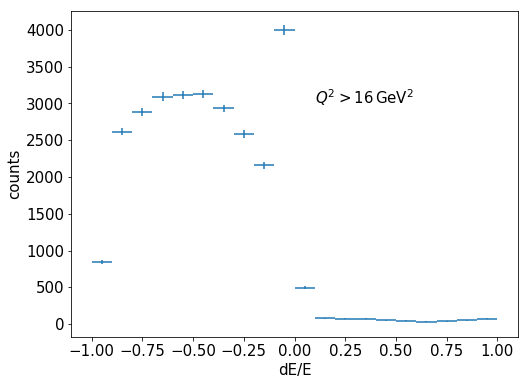

In [8]:
fig = plt.figure(figsize=(8,6))
plt.errorbar(x, y, xerr=xerr, yerr=yerr, fmt='none')
plt.xlabel('dE/E', fontsize=15)
plt.ylabel('counts', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.text(0.1, 3000, '$Q^2 > 16 \, \mathrm{GeV^2}$', fontsize=15)
plt.savefig('images/de0.png', bbox_inches='tight')

In [9]:
x = np.arange(-0.95, 1.05, 0.1)
y = np.histogram(b['de_e'], bins=20, range=(-1,1))[0]
xerr = 0.05
yerr = np.sqrt(y)

Text(0.1,150,'$Q^2 > 16 \\, \\mathrm{GeV^2}$ \n $|\\eta^{rec}_{jet}| < 0.7$ \n $N^{tru}_{jet}, N^{rec}_{jet} \\geq 4$ \n $E^{tru}_{jet}, E^{rec}_{jet} > 5 \\, \\mathrm{GeV}$')

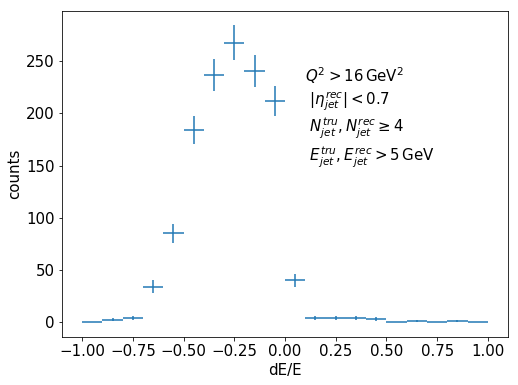

In [10]:
fig = plt.figure(figsize=(8,6))
plt.errorbar(x, y, xerr=xerr, yerr=yerr, fmt='none')
plt.xlabel('dE/E', fontsize=15)
plt.ylabel('counts', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.text(0.1, 150, '$Q^2 > 16 \, \mathrm{GeV^2}$ \n $|\eta^{rec}_{jet}| < 0.7$ \n $N^{tru}_{jet}, N^{rec}_{jet} \geq 4$ \n $E^{tru}_{jet}, E^{rec}_{jet} > 5 \, \mathrm{GeV}$', fontsize=15)
plt.savefig('images/de1.png', bbox_inches='tight')

In [11]:
x = np.arange(-0.95, 1.05, 0.1)
y = np.histogram(c['de_e'], bins=20, range=(-1,1))[0]
xerr = 0.05
yerr = np.sqrt(y)

Text(0.1,40,'$Q^2 > 16 \\, \\mathrm{GeV^2}$ \n $|\\eta^{rec}_{jet}| < 0.1$ \n $N^{rec}_{jet} \\geq 2$ \n $E^{rec}_{jet} > 5 \\, \\mathrm{GeV}$')

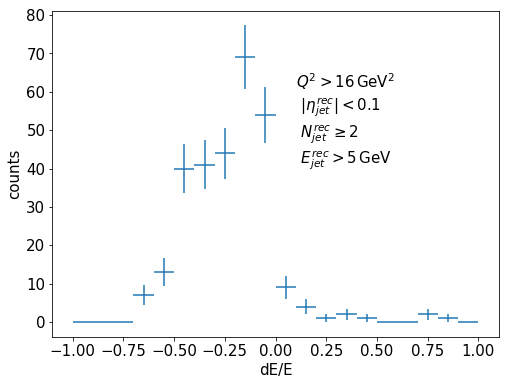

In [13]:
fig = plt.figure(figsize=(8,6))
plt.errorbar(x, y, xerr=xerr, yerr=yerr, fmt='none')
plt.xlabel('dE/E', fontsize=15)
plt.ylabel('counts', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.text(0.1, 40, '$Q^2 > 16 \, \mathrm{GeV^2}$ \n $|\eta^{rec}_{jet}| < 0.1$ \n $N^{rec}_{jet} \geq 2$ \n $E^{rec}_{jet} > 5 \, \mathrm{GeV}$', fontsize=15)
plt.savefig('images/de2.png', bbox_inches='tight')

In [14]:
file2 = ["$HOME/EIC/output/allsi/618.root"]

In [15]:
a2 = getData(file2)


Processed $HOME/EIC/output/allsi/618.root in 9.6 seconds


In [16]:
a2.eval('de_e = (e - matched_truthE) / matched_truthE', inplace=True)
c2 = applyCut(a2, 'abs(eta) < 0.1', 'eta')
c2 = applyCut(c2, 'nComponent > 1', 'nComponent')
c2 = applyCut(c2, 'e > 5', 'e')

eta 41183  fraction kept: 3.4
nComponent 21973  fraction kept: 53.4
e 5422  fraction kept: 24.7


Text(0.1,1,'$Q^2 > 16 \\, \\mathrm{GeV^2}$ \n $|\\eta^{rec}_{jet}| < 0.1$ \n $N^{rec}_{jet} \\geq 2$ \n $E^{rec}_{jet} > 5 \\, \\mathrm{GeV}$')

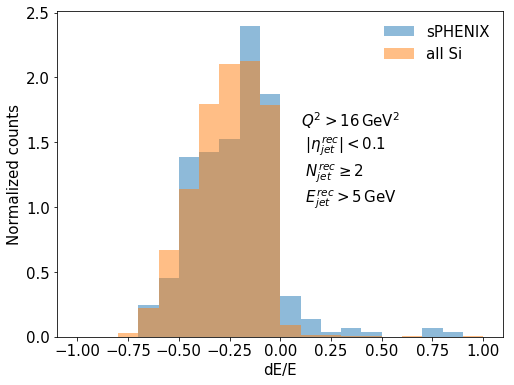

In [19]:
fig = plt.figure(figsize=(8,6))
plt.hist(c['de_e'], bins=20, range=(-1,1), alpha=0.5, normed=True, label='sPHENIX')
plt.hist(c2['de_e'], bins=20, range=(-1,1), alpha=0.5, normed=True, label='all Si')
plt.xlabel('dE/E', fontsize=15)
plt.ylabel('Normalized counts', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(prop={'size': 15}, frameon=False, loc='best')
plt.text(0.1, 1.0, '$Q^2 > 16 \, \mathrm{GeV^2}$ \n $|\eta^{rec}_{jet}| < 0.1$ \n $N^{rec}_{jet} \geq 2$ \n $E^{rec}_{jet} > 5 \, \mathrm{GeV}$', fontsize=15)
plt.savefig('images/de_sphenix_allsi.png', bbox_inches='tight')